# Exploration der Word2vec Embeddings 20

- balanciertes Korpus
- ohne Bigramme
- vector_size: 300
- window: 5
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec20', '20w2v13.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [8]:
presto0

{'1700-1750': 0.22485171258449554,
 '1751-1800': 0.23322203755378723,
 '1801-1825': 0.36400651931762695,
 '1826-1850': 0.3448300361633301,
 '1851-1875': 0.3279191255569458,
 '1876-1900': 0.27340781688690186,
 '1901-1925': 0.2681354284286499,
 '1926-1950': 0.23325864970684052,
 '1951-1975': 0.3334808051586151,
 '1976-2000': 0.3045535981655121,
 '2001-2010': 0.28398337960243225,
 '2011-2016': 0.2522675096988678,
 '2017-2021': 0.3493955135345459}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

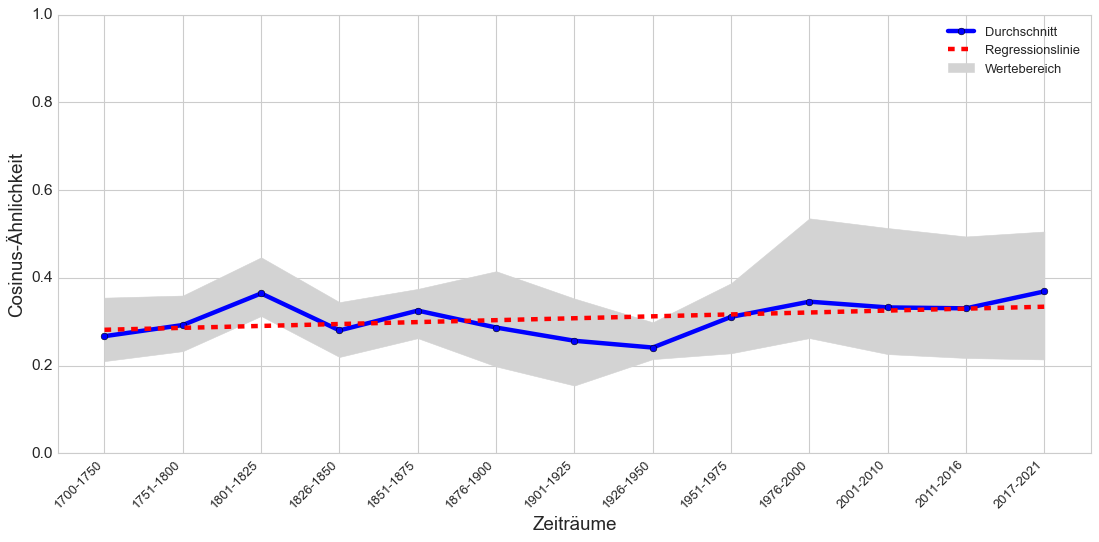

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [15]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [16]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [17]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [18]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [19]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [20]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [21]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [22]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [23]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [24]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

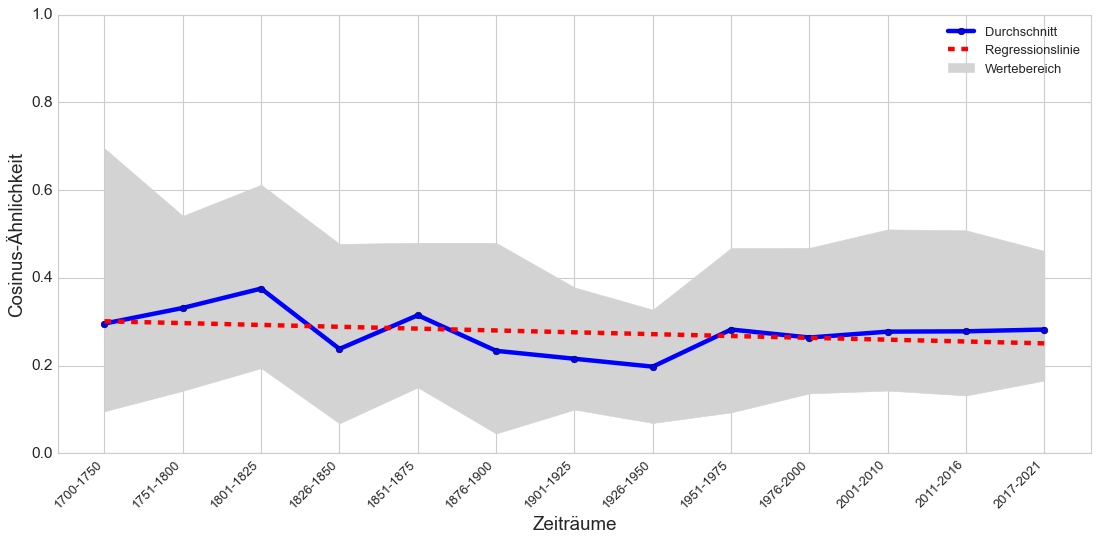

In [25]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [26]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(impazzirmi, 0.9565139412879944)","(bacherozzoli, 0.9700247645378113)","(palafreniere, 0.9578908681869507)","(despota, 0.8514170050621033)","(crudeltà, 0.8703456521034241)","(inflessibile, 0.72475266456604)","(sofferse, 0.7488185167312622)","(straziare, 0.7928493022918701)","(fantasticare, 0.8339242935180664)","(eroico, 0.8391088247299194)","(torturare, 0.8386483788490295)","(torturare, 0.8702932000160217)","(demone, 0.8470269441604614)"
1,"(fn, 0.9559919834136963)","(piangerem, 0.969887912273407)","(rincularono, 0.9574538469314575)","(incrudelire, 0.8512303829193115)","(bestiale, 0.8696754574775696)","(vilipendere, 0.7127873301506042)","(zuccone, 0.7449332475662231)","(atroce, 0.7847946286201477)","(gioire, 0.8243590593338013)","(ferocia, 0.8172779083251953)","(crudeltà, 0.8153771162033081)","(oltraggiare, 0.8342689275741577)","(opprimere, 0.844728410243988)"
2,"(curarti, 0.9536676406860352)","(sopita, 0.9698270559310913)","(venendomi, 0.9568490982055664)","(inimicare, 0.846294641494751)","(spietato, 0.8675738573074341)","(onta, 0.7050672173500061)","(riamare, 0.7429381608963013)","(scampato, 0.7705830335617065)","(trabocchetto, 0.8055747151374817)","(crudeltà, 0.8057624101638794)","(mutilare, 0.8113331198692322)","(perseguitare, 0.8208281397819519)","(orrendo, 0.8442472219467163)"
3,"(indebolirci, 0.9536463618278503)","(dellaesercito, 0.9696133732795715)","(perigliosi, 0.9562388062477112)","(vilipendere, 0.8443348407745361)","(umiliazione, 0.8583756685256958)","(scatenato, 0.7028380632400513)","(straube, 0.7407129406929016)","(avvilimento, 0.7700307369232178)","(immondo, 0.7982882261276245)","(sacrificale, 0.8054339289665222)","(maledizione, 0.7994698882102966)","(accecare, 0.8193678259849548)","(crudele, 0.8340356349945068)"
4,"(questovolentieri, 0.9536256194114685)","(monta, 0.9691531658172607)","(allenti, 0.9558928608894348)","(pericolante, 0.8408389091491699)","(libidine, 0.8555707335472107)","(oppressore, 0.6947920322418213)","(straziato, 0.7403615117073059)","(attanagliare, 0.7686546444892883)","(avvampare, 0.7975491285324097)","(crudele, 0.8046786785125732)","(orrendamente, 0.7991728186607361)","(innocente, 0.8186101317405701)","(tormento, 0.8307948708534241)"
5,"(aulide, 0.9525071382522583)","(fremo, 0.9687041640281677)","(scempiezza, 0.9550899863243103)","(scolpare, 0.8396047949790955)","(obbrobrio, 0.8533374071121216)","(insulto, 0.6941623687744141)","(esecrando, 0.732367217540741)","(represso, 0.7643270492553711)","(prostrare, 0.7973765134811401)","(atroce, 0.7988736033439636)","(dilaniare, 0.7965779304504395)","(vile, 0.8149001598358154)","(atterrita, 0.8287574648857117)"
6,"(patrare, 0.9522298574447632)","(moria, 0.9684807658195496)","(trinciator, 0.9550631046295166)","(libidine, 0.8394447565078735)","(avvilire, 0.8531914949417114)","(contumelia, 0.6876413822174072)","(assassinare, 0.7307824492454529)","(tirannide, 0.762818455696106)","(ribrezzo, 0.7972254753112793)","(cruento, 0.7986867427825928)","(insopportabile, 0.7850115299224854)","(malvagio, 0.810744047164917)","(soffocare, 0.8247889280319214)"
7,"(mperi, 0.9513593316078186)","(inseparabil, 0.9682697057723999)","(macchinatore, 0.9543702006340027)","(indegnamente, 0.8393730521202087)","(vilt, 0.8514652252197266)","(usufruttando, 0.6872634291648865)","(cagion, 0.7272652387619019)","(invase, 0.7609930634498596)","(impaurita, 0.7971225380897522)","(brigante, 0.7979944348335266)","(turba, 0.7805514931678772)","(inerme, 0.8097711205482483)","(malvagio, 0.8226498365402222)"
8,"(natovi, 0.9510550498962402)","(amatus, 0.9682578444480896)","(usurparmi, 0.9537418484687805)","(ingiustamente, 0.8388544321060181)","(irritato, 0.8494200110435486)","(schernire, 0.6862555742263794)","(prigionia, 0.725944995880127)","(torturare, 0.7608200311660767)","(offeso, 0.795850932598114)","(schizofrenico, 0.7975415587425232)","(sedurre, 0.780148684978

In [27]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.425944983959198,
 '1751-1800': 0.47823864221572876,
 '1801-1825': 0.46766576170921326,
 '1826-1850': 0.37047281861305237,
 '1851-1875': 0.4801168143749237,
 '1876-1900': 0.37278932332992554,
 '1901-1925': 0.3639827370643616,
 '1926-1950': 0.294516921043396,
 '1951-1975': 0.32955604791641235,
 '1976-2000': 0.4597640931606293,
 '2001-2010': 0.39520180225372314,
 '2011-2016': 0.36275362968444824,
 '2017-2021': 0.386151522397995}

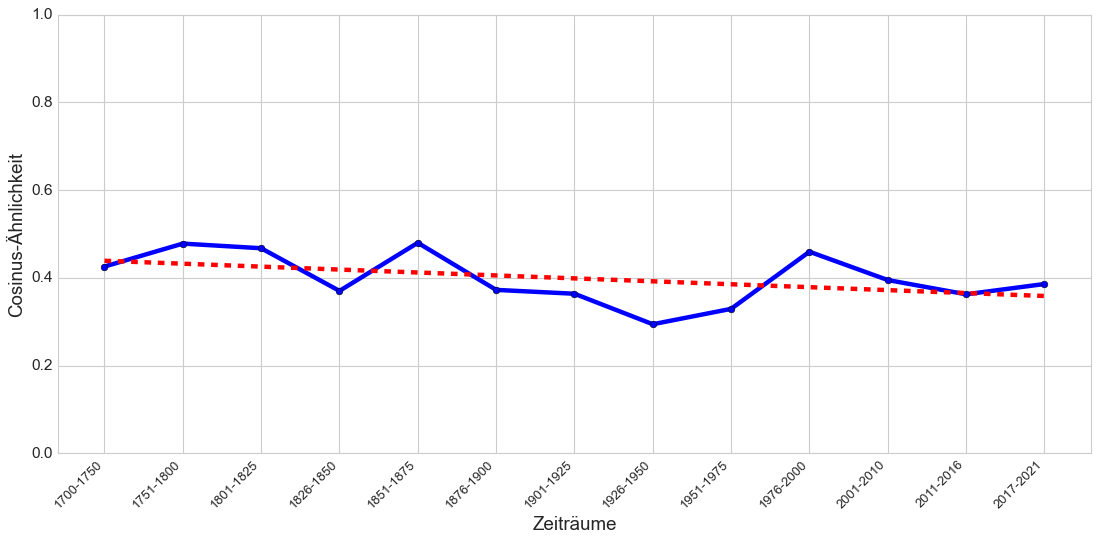

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

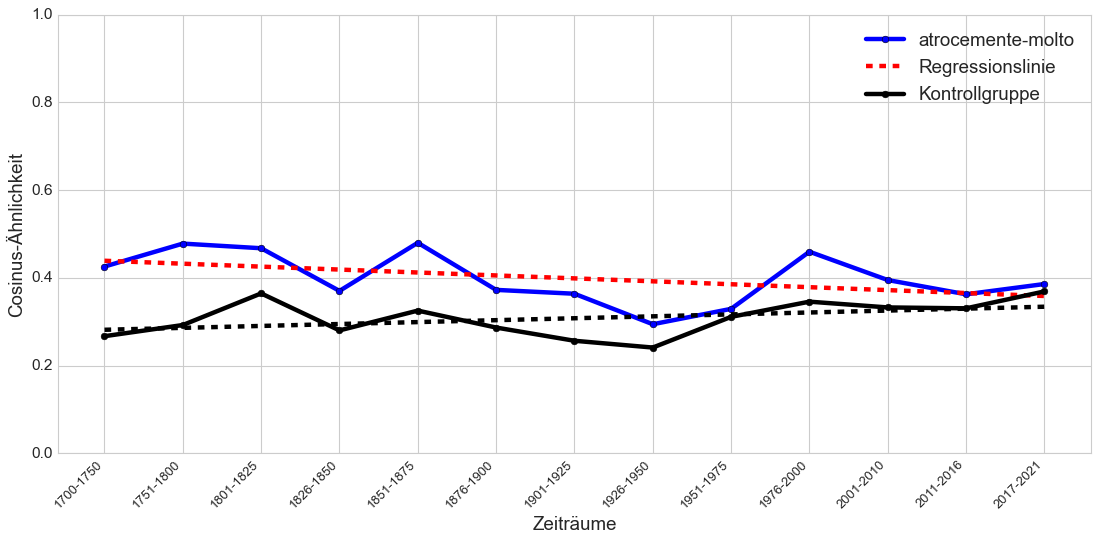

In [29]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [34]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [35]:
atrocemente1

{'1700-1750': 0.71884685754776,
 '1751-1800': 0.5849072337150574,
 '1801-1825': 0.5859928131103516,
 '1826-1850': 0.4182226061820984,
 '1851-1875': 0.5675809979438782,
 '1876-1900': 0.42547574639320374,
 '1901-1925': 0.3658508360385895,
 '1926-1950': 0.3997096121311188,
 '1951-1975': 0.5720685124397278,
 '1976-2000': 0.41844746470451355,
 '2001-2010': 0.558686375617981,
 '2011-2016': 0.5805174112319946,
 '2017-2021': 0.6447563171386719}

In [36]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

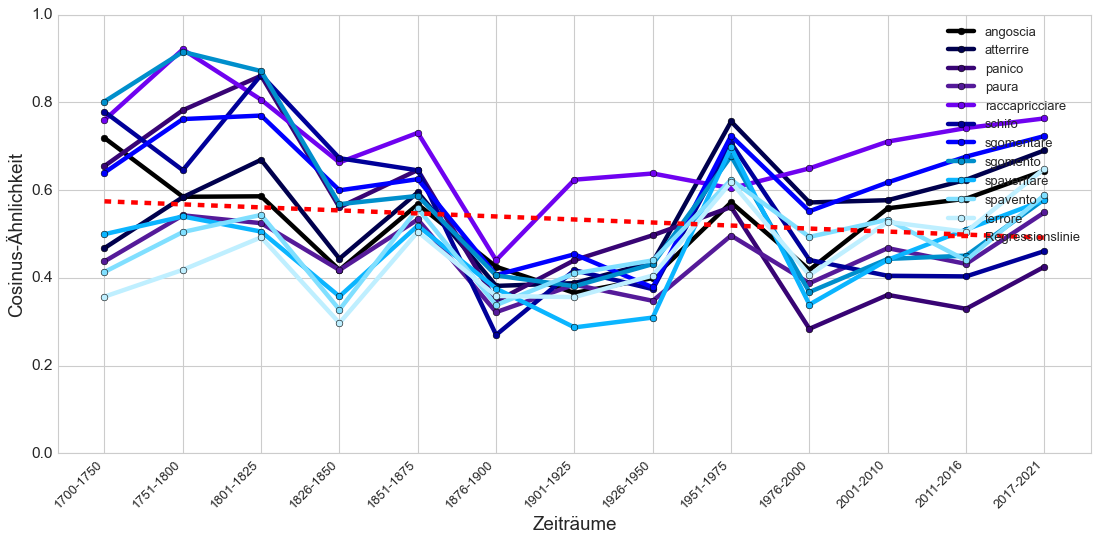

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

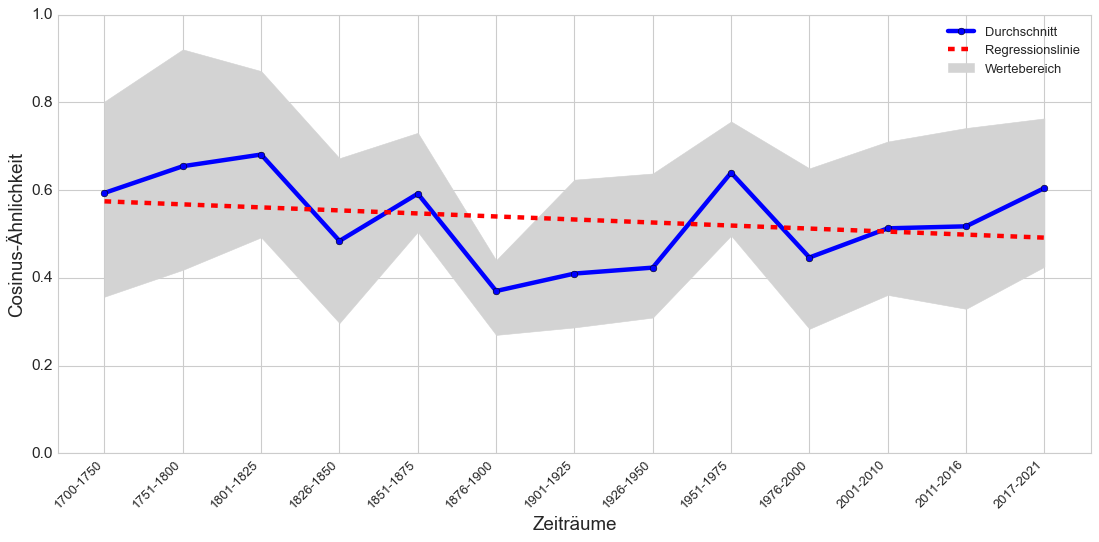

In [38]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

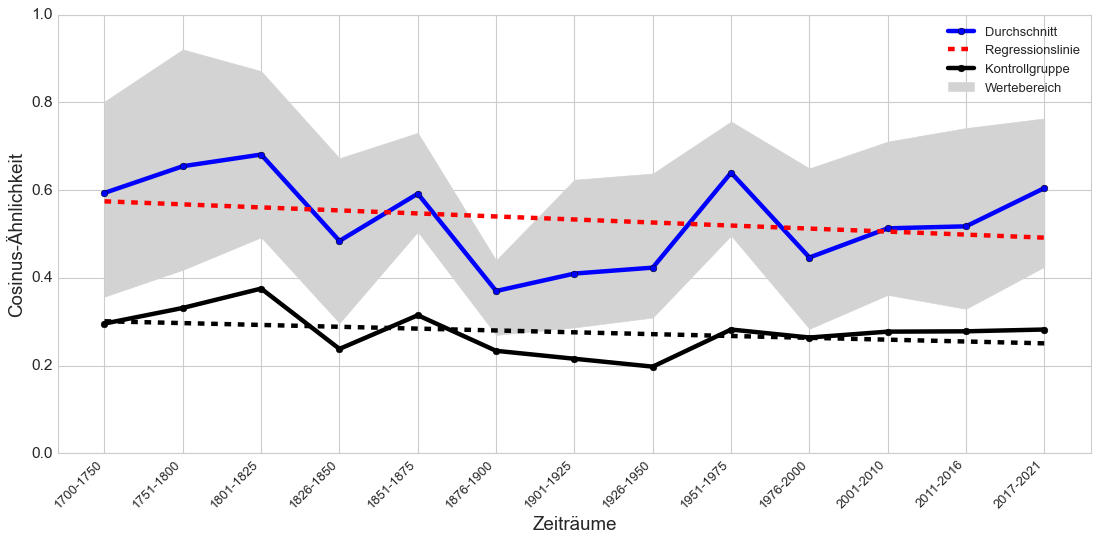

In [39]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [40]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(troncarlo, 0.9729939699172974)","(riseghe, 0.9745392203330994)","(rincantucciandosi, 0.9218843579292297)","(spessore, 0.8805351853370667)","(plasticità, 0.9272096753120422)",not in vocab,"(sofisticati, 0.976978063583374)","(smembrare, 0.8717825412750244)","(interiormente, 0.9258453249931335)","(permeare, 0.9171048402786255)"
1,not in vocab,not in vocab,not in vocab,"(esercitata, 0.9717530012130737)","(spessezza, 0.9712865948677063)","(miagolare, 0.9186999797821045)","(telaio, 0.8773975372314453)","(utilizzo, 0.9261384010314941)",not in vocab,"(paludoso, 0.9685544371604919)","(ebraismo, 0.8699340224266052)","(testardo, 0.9228330254554749)","(coesistere, 0.9168998599052429)"
2,not in vocab,not in vocab,not in vocab,"(separabile, 0.9710681438446045)","(parallelogrammo, 0.9688810110092163)","(buss, 0.9178809523582458)","(palanchino, 0.8773216605186462)","(epistemologico, 0.9121847748756409)",not in vocab,"(daghestan, 0.9675530791282654)","(stritolare, 0.8663512468338013)","(interiorità, 0.9226768016815186)","(disinteressato, 0.9150181412696838)"
3,not in vocab,not in vocab,not in vocab,"(inogni, 0.9710659384727478)","(qr, 0.9687498211860657)","(guerino, 0.9177461266517639)","(scòrse, 0.8770750761032104)","(identit, 0.9115430116653442)",not in vocab,"(gioiosa, 0.9671058654785156)","(gravitazionale, 0.8650445938110352)","(ansietà, 0.9213999509811401)","(destabilizzazione, 0.9144585728645325)"
4,not in vocab,not in vocab,not in vocab,"(distruggendole, 0.9703614711761475)","(acquaio, 0.968334436416626)","(scucire, 0.9164897203445435)","(gonga, 0.8763264417648315)","(automatici, 0.9112074375152588)",not in vocab,"(kkv, 0.9666542410850525)","(distruttore, 0.8650342226028442)","(rodere, 0.9207164645195007)","(miliare, 0.9072778820991516)"
5,not in vocab,not in vocab,not in vocab,"(incombattuti, 0.9693745374679565)","(riquadro, 0.9677761793136597)","(cullavano, 0.916390061378479)","(allontan, 0.8760517835617065)","(chimiche, 0.9108629822731018)",not in vocab,"(colombiadi, 0.9654672741889954)","(brutalità, 0.8645415306091309)","(pipistrello, 0.9191929697990417)","(capitalistico, 0.9069177508354187)"
6,not in vocab,not in vocab,not in vocab,"(sincomincio, 0.968385636806488)","(internato, 0.9667739272117615)","(tienti, 0.9148545265197754)","(stramazza, 0.8731998205184937)","(interna, 0.9099536538124084)",not in vocab,"(commissariata, 0.9651123285293579)","(disarmato, 0.8631564974784851)","(distorcere, 0.9185691475868225)","(contrapposto, 0.9064634442329407)"
7,not in vocab,not in vocab,not in vocab,"(sallust, 0.9683186411857605)","(velocissimamente, 0.9666301012039185)","(sbuffando, 0.9147329926490784)","(stipite, 0.8729636669158936)","(realizzata, 0.9097667336463928)",not in vocab,"(caposaldo, 0.965039074420929)","(indomabile, 0.8631153702735901)","(microcosmo, 0.9177212715148926)","(pregnanza, 0.9056826829910278)"
8,not in vocab,not in vocab,not in vocab,"(amicare, 0.9680179357528687)","(vaporino, 0.9661573767662048)","(colica, 0.9145355820655823)","(proboscide, 0.8728998303413391)","(perturbare, 0.909007728099823)",not in vocab,"(caricamento, 0.9649965167045593)","(sproporzione, 0.8621314764022827)","(cosmico, 0.9177196621894836)","(antropologico, 0.9034443497657776)"
9,not in vocab,not in vocab,not in vocab,"(eclisse, 0.9679630994796753)","(bop, 0.9659869074821472)","(rallent, 0.9141662120819092)","(brandito, 0.8715876936912537)","(molecolare, 0.9075338244438171)",not in vocab,"(pollame, 0.9643055200576782)","(intemperia, 0.8618232607841492)","(colei, 0.9175361394882202)","(ontologico, 0.9034303426742554)"


In [41]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.4616750478744507,
 '1851-1875': 0.4456002712249756,
 '1876-1900': 0.5033740997314453,
 '1901-1925': 0.35869696736335754,
 '1926-1950': 0.44959113001823425,
 '1976-2000': 0.5248955488204956,
 '2001-2010': 0.505682110786438,
 '2011-2016': 0.5824987888336182,
 '2017-2021': 0.5298203229904175}

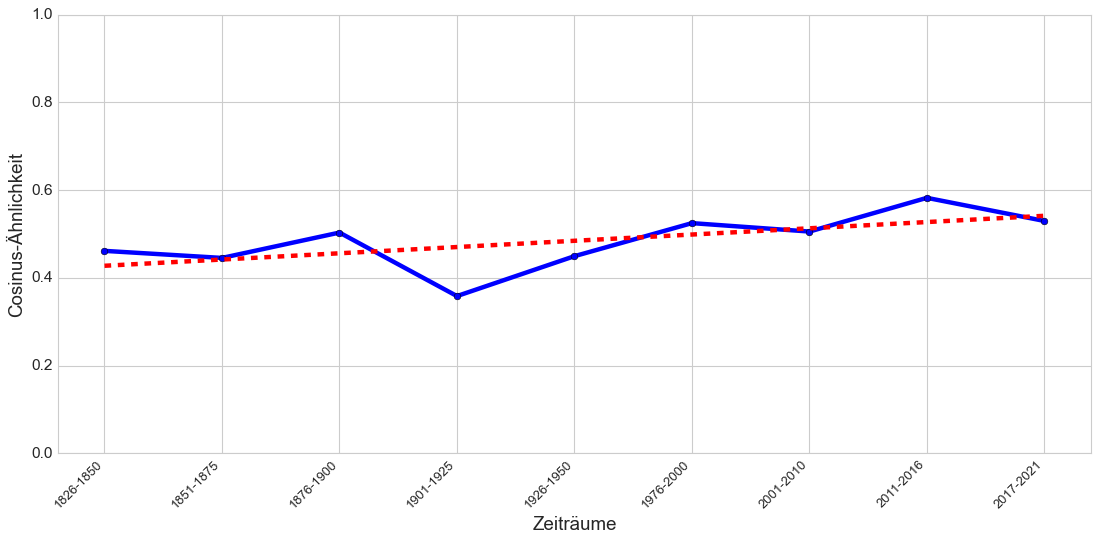

In [42]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [43]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [44]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

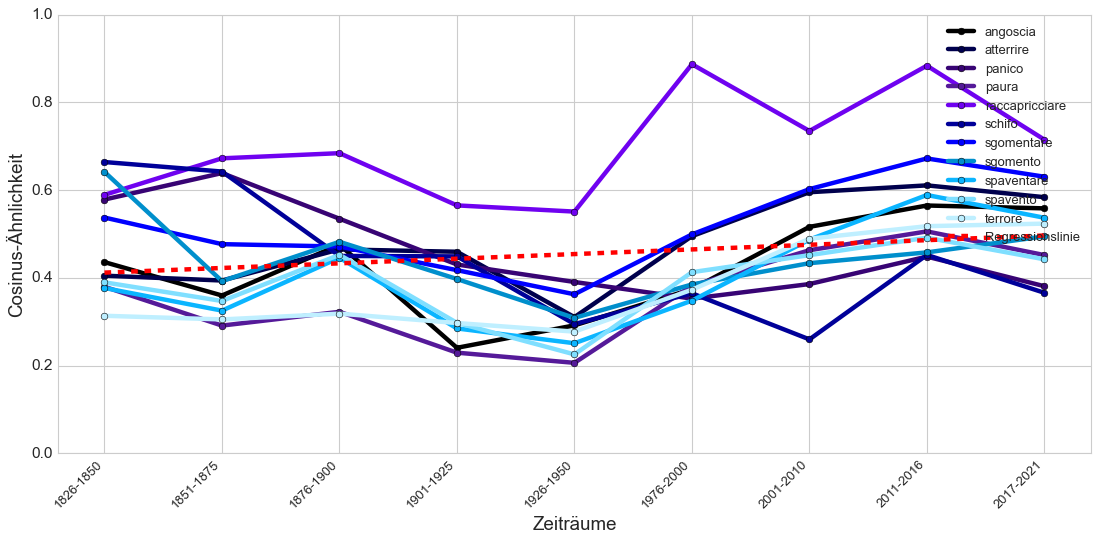

In [45]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

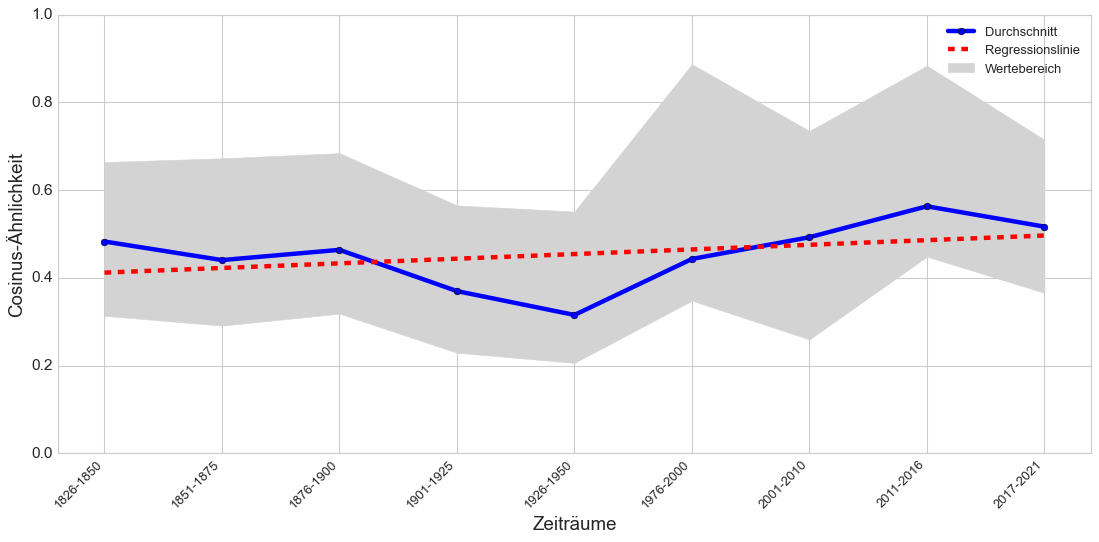

In [46]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [47]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(deformare, 0.9543935060501099)",not in vocab,"(tauro, 0.953828752040863)","(inframmettendovi, 0.9582918286323547)","(irritabile, 0.9576427340507507)","(spasmodico, 0.8766937255859375)","(sognate, 0.8474991917610168)","(mandorlati, 0.8265863060951233)","(trepidamente, 0.885261595249176)","(dotato, 0.8471511006355286)","(spaventosamente, 0.7928876280784607)","(spaventosamente, 0.7833600044250488)","(spaventosamente, 0.816931426525116)"
1,"(lasciossiin, 0.9405313730239868)",not in vocab,"(damman, 0.9530810117721558)","(compatibilissimi, 0.9579569101333618)","(ripugnanze, 0.9453559517860413)","(improvvisa, 0.870053768157959)","(veggono, 0.8393017053604126)","(umor, 0.8244897723197937)","(cereo, 0.8794344663619995)","(egoista, 0.8249190449714661)","(alquanto, 0.7653711438179016)","(sensuale, 0.7698838710784912)","(tremendamente, 0.7702755331993103)"
2,"(agilità, 0.9365578293800354)",not in vocab,"(cadmei, 0.9507386088371277)","(seguitate, 0.9565725922584534)","(abbietta, 0.9415181875228882)","(lacerazione, 0.8644904494285583)","(dissimile, 0.8211238384246826)","(serico, 0.8220542073249817)","(equilibrattissima, 0.8737940788269043)","(agile, 0.8152478933334351)","(tremendamente, 0.751179575920105)","(incredibilmente, 0.7638717889785767)","(terribilmente, 0.7655544281005859)"
3,"(scossail, 0.936521053314209)",not in vocab,"(gerletto, 0.9493143558502197)","(nomucciacci, 0.9563391208648682)","(incomprensibile, 0.9385731816291809)","(sanguinolento, 0.8630853295326233)","(irreparabilmente, 0.8136979937553406)","(imberbe, 0.8218483328819275)","(astruso, 0.8732481002807617)","(orripilante, 0.8145138621330261)","(talmente, 0.7430550456047058)","(sospettoso, 0.7592951059341431)","(crudo, 0.7575731873512268)"
4,"(repetizione, 0.9302543997764587)",not in vocab,"(affrettar, 0.94810551404953)","(scomunicata, 0.9554104804992676)","(attaccamento, 0.9371367692947388)","(illanguidire, 0.8596374988555908)","(significazione, 0.811984658241272)","(ciclope, 0.8213229775428772)","(sfinge, 0.8676000833511353)","(cliché, 0.8138465285301208)","(irritante, 0.7288230061531067)","(crudo, 0.7567983865737915)","(cinico, 0.7431210875511169)"
5,"(distringue, 0.9300191402435303)",not in vocab,"(perano, 0.9478305578231812)","(affibbiargliela, 0.9550794363021851)","(attutire, 0.9371363520622253)","(veemente, 0.8568421602249146)","(collerico, 0.8118412494659424)","(smisuratamente, 0.8207392692565918)","(ampollosissimo, 0.865810215473175)","(spaventosamente, 0.8136866688728333)","(estremamente, 0.7285308837890625)","(talmente, 0.756201982498169)","(opprimente, 0.7403608560562134)"
6,"(sicom, 0.9297304749488831)",not in vocab,"(frequenti, 0.9474874138832092)","(garfagnini, 0.9550650715827942)","(prono, 0.9367567896842957)","(irrefrenabile, 0.8560293316841125)","(elevatezza, 0.8109564781188965)","(semisferici, 0.8169352412223816)","(credevi, 0.8640924692153931)","(comunicativo, 0.8062032461166382)","(ruvido, 0.7179309129714966)","(accattivante, 0.7524781823158264)","(innocuo, 0.7369323372840881)"
7,"(eseguir, 0.9291061162948608)",not in vocab,"(carozza, 0.9474303722381592)","(inciampato, 0.9546238780021667)","(irridere, 0.9350056648254395)","(inestinguibile, 0.8552715182304382)","(involgere, 0.8105131387710571)","(barcolla, 0.8165417313575745)","(intrattabile, 0.8627569079399109)","(arido, 0.8039425611495972)","(incredibilmente, 0.7174097895622253)","(straordinariamente, 0.7464088201522827)","(vena, 0.7336887717247009)"
8,"(custodirò, 0.9283189177513123)",not in vocab,"(obblii, 0.9472306966781616)","(maliardo, 0.9545393586158752)","(diffidente, 0.9345079660415649)","(pallidezza, 0.854765772819519)","(sommamente, 0.8097408413887024)","(lividore, 0.8151894211769104)","(interiormente, 0.8622927665710449)","(nitido, 0.803253173828125)","(stereotipo, 0.7168995141983032)","(alquanto, 0.7463713884353638)","(incredibilmente, 0.7296884655952454)"


In [48]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.4006264805793762,
 '1801-1825': 0.5086454153060913,
 '1826-1850': 0.44684505462646484,
 '1851-1875': 0.6111680269241333,
 '1876-1900': 0.49234938621520996,
 '1901-1925': 0.45904892683029175,
 '1926-1950': 0.36301717162132263,
 '1951-1975': 0.48282578587532043,
 '1976-2000': 0.6035706400871277,
 '2001-2010': 0.6265361309051514,
 '2011-2016': 0.619857132434845,
 '2017-2021': 0.5791577696800232}

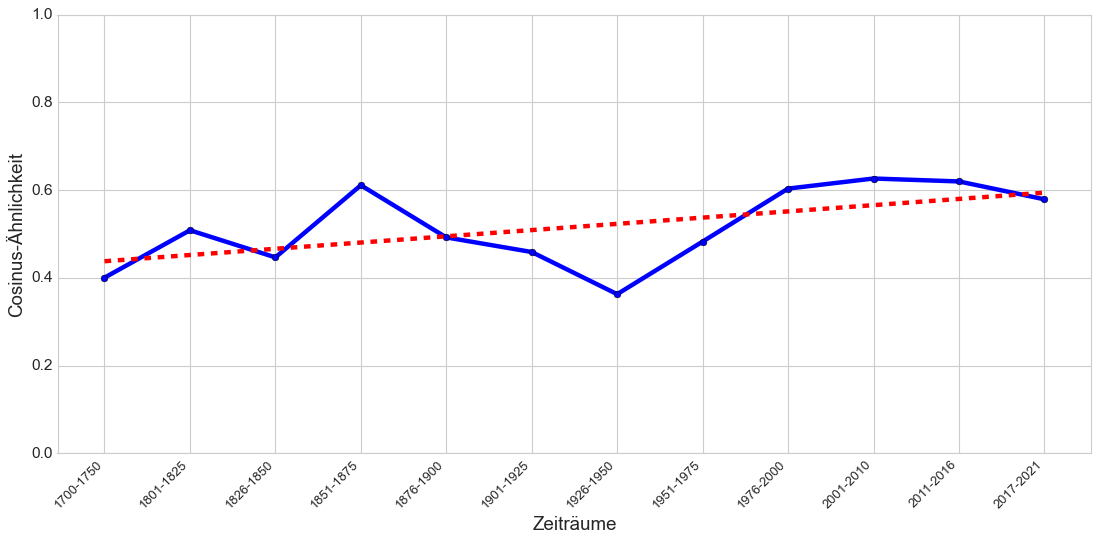

In [49]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [50]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [51]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

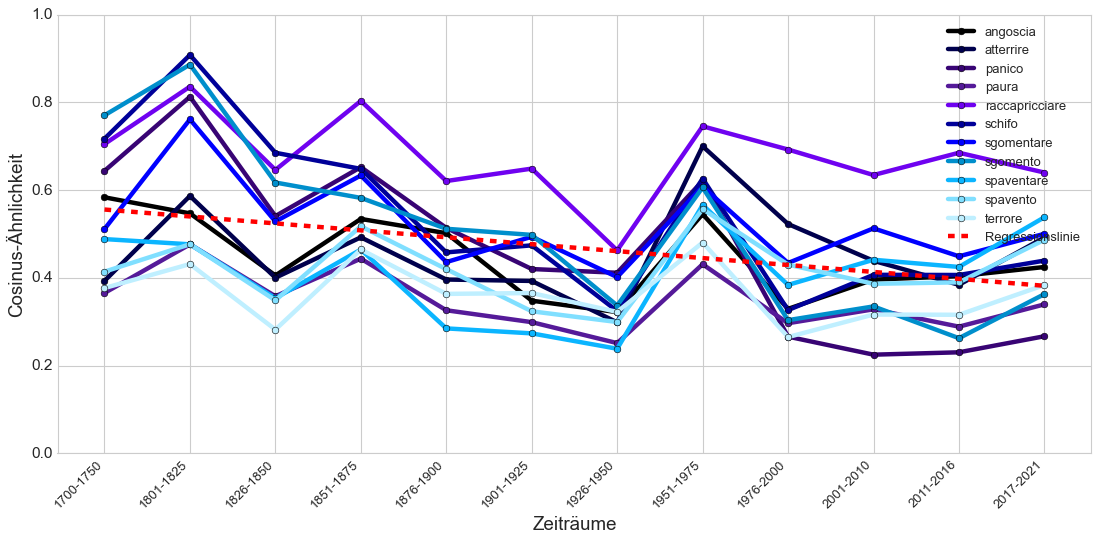

In [52]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

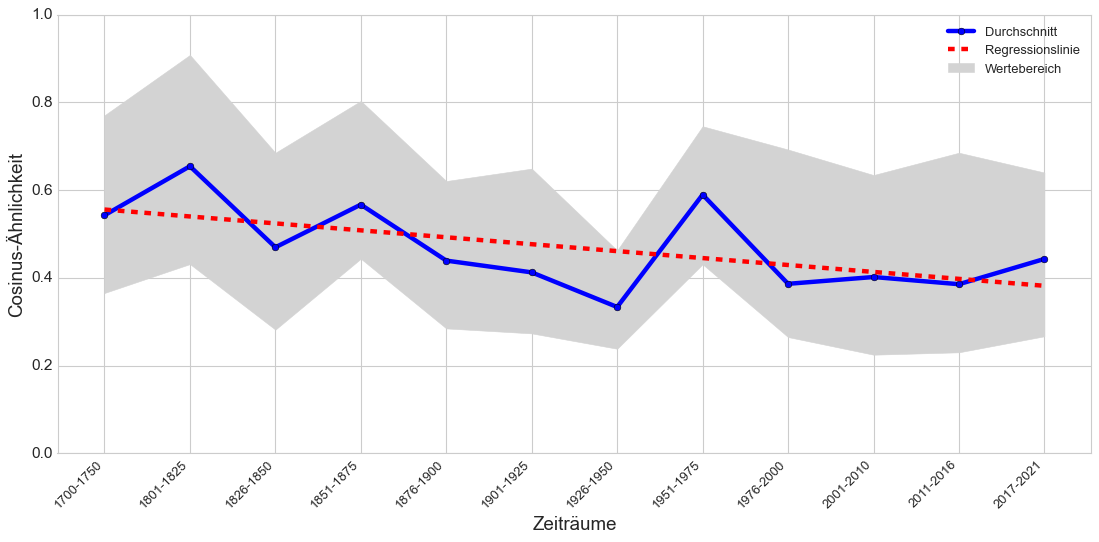

In [53]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [54]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(inzuppossi, 0.9561586380004883)",not in vocab,"(nugolo, 0.943915843963623)","(invasata, 0.9201880097389221)","(inumidire, 0.9293155670166016)","(gorgogliare, 0.8356852531433105)","(felino, 0.8150847554206848)","(avvertiva, 0.7895537614822388)","(griséttes, 0.9127140641212463)","(mutilare, 0.8884787559509277)","(mutilare, 0.8306558132171631)","(mutilare, 0.9025611281394958)","(orribilmente, 0.8713693618774414)"
1,"(chiudimi, 0.9559399485588074)",not in vocab,"(austri, 0.9383098483085632)","(pasce, 0.9145714640617371)","(pallidezza, 0.9203051328659058)","(allibire, 0.8274995684623718)","(schiacciato, 0.8141921758651733)","(soppiatto, 0.7791202664375305)","(messale, 0.9071823954582214)","(orribilmente, 0.8636291027069092)","(orribilmente, 0.8264126777648926)","(orribilmente, 0.8533896803855896)","(mutilare, 0.8618515729904175)"
2,"(incendiano, 0.9558049440383911)",not in vocab,"(flutti, 0.9310188293457031)","(oppressor, 0.9142176508903503)","(vampa, 0.9162759780883789)","(arsura, 0.8262321352958679)","(ruggiva, 0.8119379281997681)","(vóto, 0.7757783532142639)","(augelletto, 0.9067026376724243)","(sfigurato, 0.8460990786552429)","(sfigurare, 0.8086482882499695)","(sfigurato, 0.8501253128051758)","(sfigurato, 0.8446386456489563)"
3,"(lavarlo, 0.955365002155304)",not in vocab,"(acquoso, 0.9265920519828796)","(agresto, 0.9141705632209778)","(ghiacciato, 0.9161814451217651)","(fantasima, 0.8219209313392639)","(mutilare, 0.8063475489616394)","(dolorante, 0.7701160907745361)","(profondare, 0.904233992099762)","(straziato, 0.8405747413635254)","(atrocemente, 0.7991728782653809)","(straziare, 0.8281605839729309)","(sfigurare, 0.8407262563705444)"
4,"(rapirle, 0.9548497796058655)",not in vocab,"(ocean, 0.9264602661132812)","(estranie, 0.9135414361953735)","(stravolgere, 0.914126455783844)","(grondante, 0.8210195899009705)","(spaccare, 0.8050534725189209)","(idìllio, 0.7640159726142883)","(invocandola, 0.9033409357070923)","(mutilato, 0.8393738269805908)","(sfigurato, 0.7907240390777588)","(sfigurare, 0.8256010413169861)","(straziato, 0.8240034580230713)"
5,"(diconsi, 0.954819917678833)",not in vocab,"(spumosi, 0.9199193120002747)","(salvatico, 0.9134889245033264)","(sanguigno, 0.91380375623703)","(imporporare, 0.8209131956100464)","(ventre, 0.799126923084259)","(insudiciarsi, 0.7637779116630554)","(corbe, 0.9020028710365295)","(sfigurati, 0.8302223682403564)","(deturpare, 0.7724334001541138)","(fanciulla, 0.8209362030029297)","(seviziare, 0.808627188205719)"
6,"(prosontuosi, 0.9543861150741577)",not in vocab,"(atterrite, 0.9195439219474792)","(gemea, 0.9133349061012268)","(gonfiare, 0.9113934636116028)","(parean, 0.8176762461662292)","(deturpato, 0.7990139722824097)","(petraia, 0.7624316811561584)","(scagliatagli, 0.9018797874450684)","(carbonizzare, 0.8096956610679626)","(deformare, 0.7598661780357361)","(seviziare, 0.8057892918586731)","(serpente, 0.798862636089325)"
7,"(moncone, 0.9543840885162354)",not in vocab,"(unghia, 0.9193423986434937)","(aggirar, 0.9128701686859131)","(rettile, 0.9102650284767151)","(picchio, 0.8146458268165588)","(dilaniare, 0.7827657461166382)","(sediletto, 0.7607643604278564)","(carrozzino, 0.901781439781189)","(cadavere, 0.8069968223571777)","(torturare, 0.7561956644058228)","(atterrite, 0.8035154938697815)","(straziare, 0.7979426383972168)"
8,"(postilla, 0.9541122317314148)",not in vocab,"(solcare, 0.9187801480293274)","(disperamente, 0.9126964211463928)","(sfavillare, 0.9102061986923218)","(voragine, 0.8142356872558594)","(riverso, 0.7753976583480835)","(effluvii, 0.7578628659248352)","(mirto, 0.9015957713127136)","(ustionato, 0.7853659987449646)","(straziato, 0.7524721026420593)","(trucidare, 0.8001925945281982)","(giacere, 0.7924784421920776)"
9,"(sfrondare, 0.9539033770561218)",not in vocab,"(pelago, 0.9173177480697632)","(passeggian, 0.9125597476959229)","(abbarbagliare,

In [55]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.40639469027519226,
 '1801-1825': 0.4075011909008026,
 '1826-1850': 0.37160906195640564,
 '1851-1875': 0.4623044729232788,
 '1876-1900': 0.3983173370361328,
 '1901-1925': 0.2588711380958557,
 '1926-1950': 0.24588993191719055,
 '1951-1975': 0.3425147533416748,
 '1976-2000': 0.2627835273742676,
 '2001-2010': 0.30433058738708496,
 '2011-2016': 0.32926106452941895,
 '2017-2021': 0.30662354826927185}

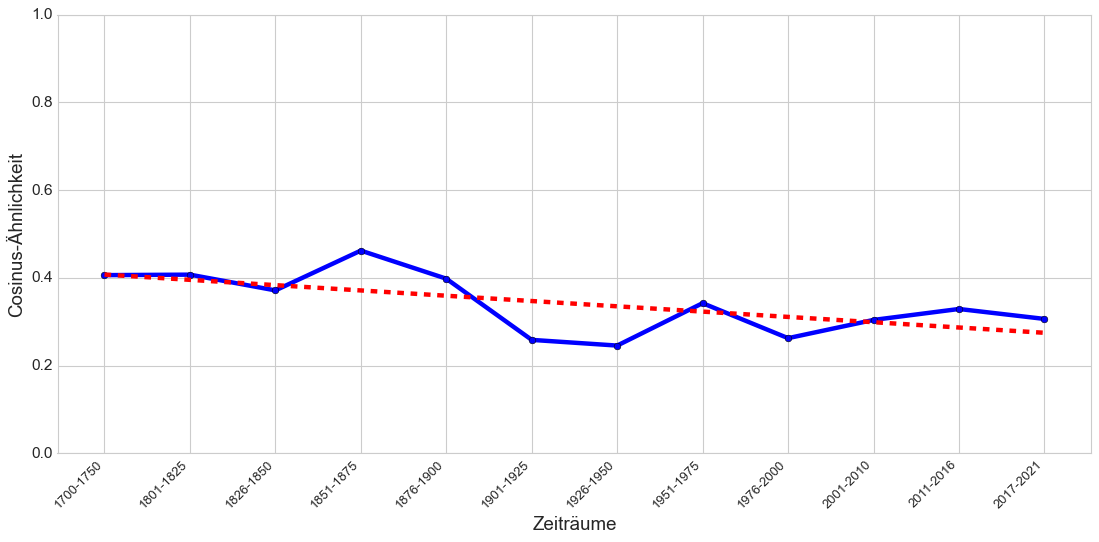

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [57]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [58]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

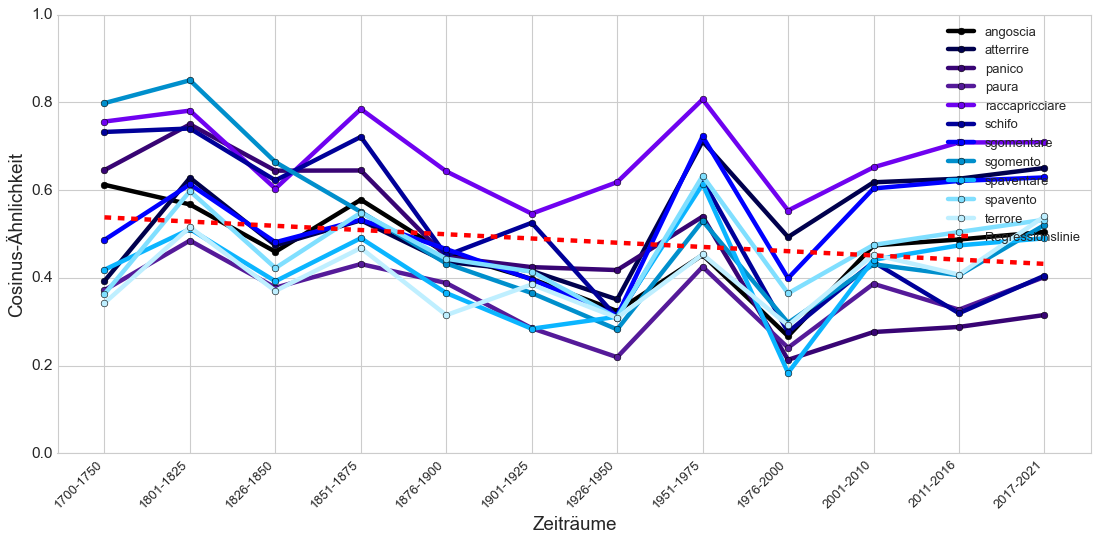

In [59]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

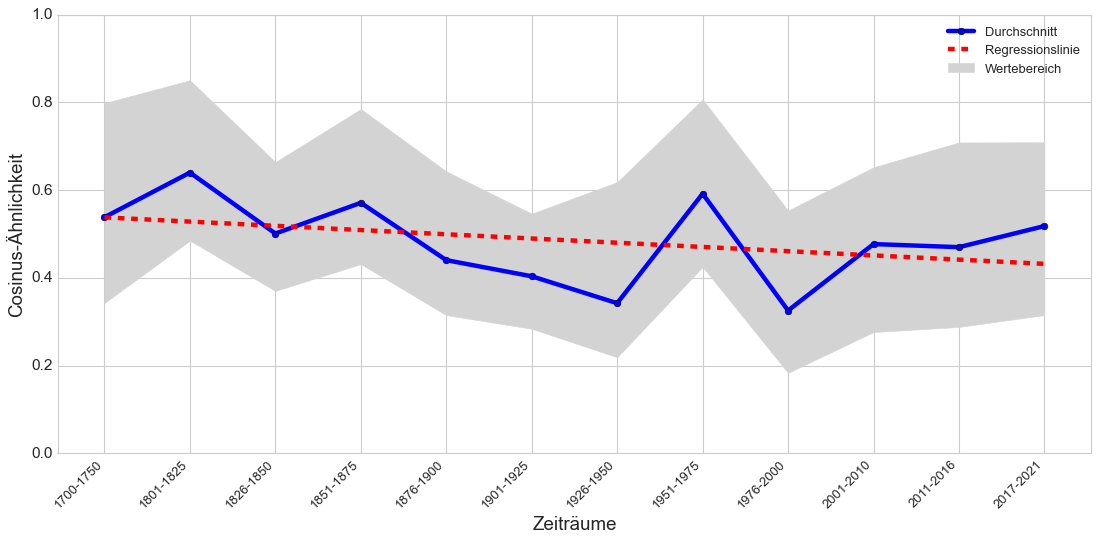

In [60]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [61]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(aquilonar, 0.896155059337616)","(spruzzare, 0.9038878083229065)","(fremito, 0.8949821591377258)","(fracassare, 0.8416220545768738)","(orrendamente, 0.8499047160148621)","(spaventosamente, 0.6470547914505005)","(orrendamente, 0.6200303435325623)","(imbavagliare, 0.7171079516410828)","(trabocchetto, 0.7961516976356506)","(orrendamente, 0.8636291027069092)","(orrendamente, 0.8264126777648926)","(orrendamente, 0.8533896207809448)","(orrendamente, 0.8713693022727966)"
1,"(stridere, 0.877815842628479)","(fischiare, 0.9025053977966309)","(dirotto, 0.8710281252861023)","(brancolare, 0.8182047605514526)","(ghiacciato, 0.8478494882583618)","(sordamente, 0.6424952745437622)","(zuccone, 0.6198319792747498)","(rantolare, 0.7136827111244202)","(spaurire, 0.7920742034912109)","(sfigurato, 0.8542082905769348)","(atrocemente, 0.7790821194648743)","(mutilare, 0.8027315139770508)","(atrocemente, 0.8071082830429077)"
2,"(mugghiare, 0.8636041879653931)","(teso, 0.8966455459594727)","(chiusi, 0.8708704113960266)","(boscaglia, 0.8149464130401611)","(rantolo, 0.8464528322219849)","(corpicino, 0.6337457895278931)","(ruggiva, 0.6171084046363831)","(cadaverico, 0.6778287887573242)","(graffiare, 0.7903817296028137)","(mutilare, 0.8530481457710266)","(mutilare, 0.7545220255851746)","(sfigurato, 0.7945855855941772)","(sfigurato, 0.8038105964660645)"
3,"(atre, 0.8612248301506042)","(sudor, 0.8963003754615784)","(fendere, 0.8703867197036743)","(fragore, 0.8148175477981567)","(pallore, 0.8416045904159546)","(mutilare, 0.6336033344268799)","(sanguinare, 0.6053678393363953)","(schifoso, 0.6594263911247253)","(inebetire, 0.783139169216156)","(straziato, 0.8371615409851074)","(sfigurare, 0.7414400577545166)","(atrocemente, 0.7735427618026733)","(mutilare, 0.802436351776123)"
4,"(sultan, 0.8547521829605103)","(lacero, 0.8937523365020752)","(languenti, 0.8696524500846863)","(burrone, 0.8116582632064819)","(tremito, 0.8357201814651489)","(arteria, 0.6317238807678223)","(impallidì, 0.5959101319313049)","(indurire, 0.6523831486701965)","(belva, 0.7790603041648865)","(mutilato, 0.8095312118530273)","(sfigurato, 0.7329210638999939)","(fanciulla, 0.7693594694137573)","(sfigurare, 0.7934910655021667)"
5,"(morde, 0.8545576930046082)","(antenna, 0.8925444483757019)","(squallore, 0.8696001768112183)","(avvallare, 0.8085562586784363)","(convulsione, 0.8350690603256226)","(orrendamente, 0.6201037764549255)","(atroce, 0.5866199731826782)","(reciso, 0.6517575979232788)","(squassare, 0.7767379879951477)","(ustionato, 0.8032563328742981)","(deturpare, 0.7220137119293213)","(livido, 0.745173454284668)","(seviziare, 0.7839886546134949)"
6,"(ceffo, 0.8542144894599915)","(rapid, 0.8917335867881775)","(scaldare, 0.8695907592773438)","(rombo, 0.808527410030365)","(pallidezza, 0.8346601724624634)","(ringhiare, 0.6187168955802917)","(terribilmente, 0.5858434438705444)","(logoro, 0.651455819606781)","(anca, 0.7766783237457275)","(straziare, 0.7980126738548279)","(deformare, 0.7177006602287292)","(straziare, 0.7440957427024841)","(straziato, 0.7748266458511353)"
7,"(rugge, 0.8536052107810974)","(abbrustolato, 0.8910850286483765)","(fanale, 0.8687543272972107)","(fendere, 0.8081626296043396)","(gonfiare, 0.8331854343414307)","(paralitico, 0.6142656207084656)","(vanamente, 0.5849316716194153)","(tragicamente, 0.6428902745246887)","(immondo, 0.776479959487915)","(sfigurati, 0.7955432534217834)","(spaventosamente, 0.7143386602401733)","(macabro, 0.7440173029899597)","(giacere, 0.7597867250442505)"
8,"(rotare, 0.8534858822822571)","(serpe, 0.8866258263587952)","(vacillare, 0.8656830787658691)","(serpeggiare, 0.8074961304664612)","(contrazione, 0.8319107294082642)","(ansima, 0.6127482652664185)","(raddrizzare, 0.5838388204574585)","(pelliccie, 0.636513888835907)","(rabbiosamente, 0.7735633254051208)","(maniaco, 0.7847558259963989)","(puzzolente, 0.7130554914474487

In [62]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.23596447706222534,
 '1751-1800': 0.3720937669277191,
 '1801-1825': 0.4524340033531189,
 '1826-1850': 0.3053319752216339,
 '1851-1875': 0.4206642508506775,
 '1876-1900': 0.40943360328674316,
 '1901-1925': 0.24459467828273773,
 '1926-1950': 0.3196956217288971,
 '1951-1975': 0.29287582635879517,
 '1976-2000': 0.3349014222621918,
 '2001-2010': 0.353154718875885,
 '2011-2016': 0.3528311848640442,
 '2017-2021': 0.3466353714466095}

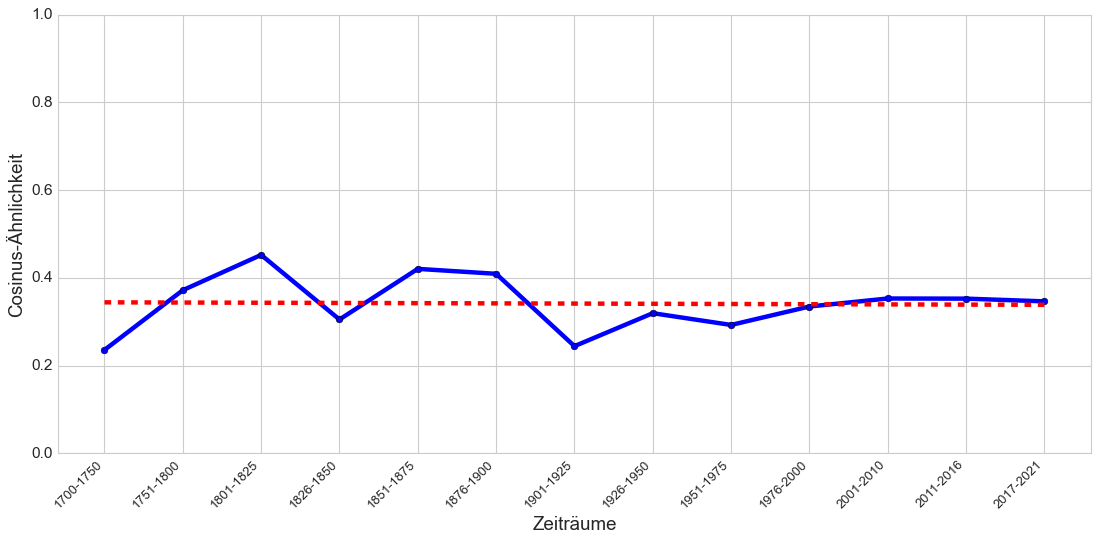

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [64]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [65]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

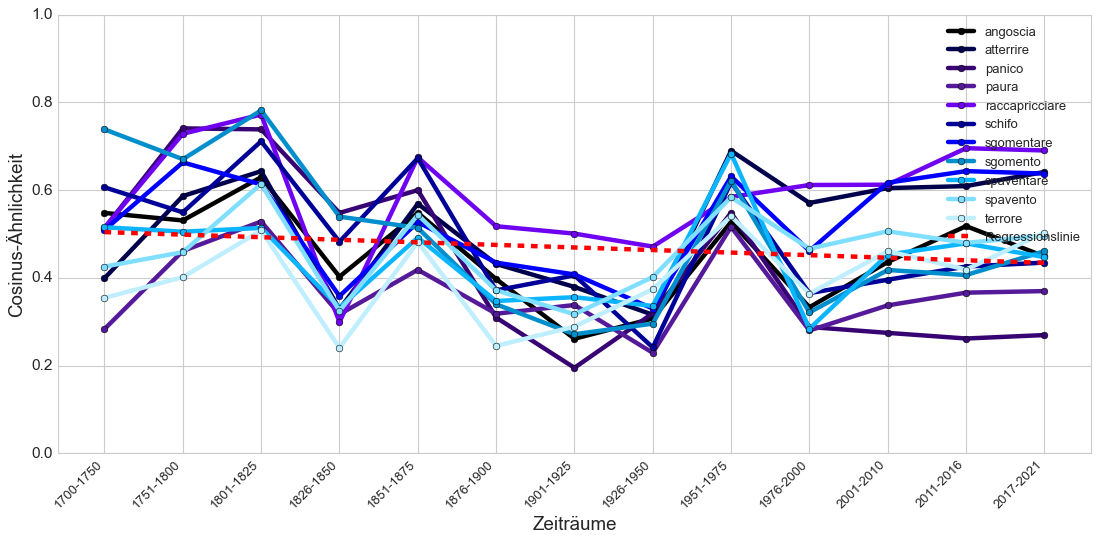

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

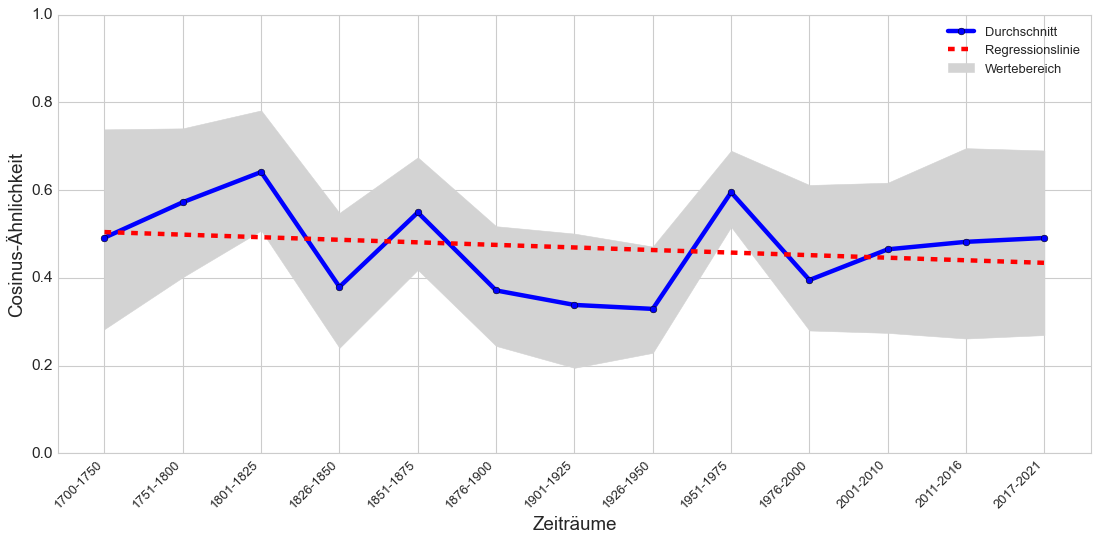

In [67]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [68]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(pestilenza, 0.8622710704803467)","(repristinavasi, 0.976151168346405)","(dido, 0.9782666563987732)","(rizzatosi, 0.9549484252929688)","(baldanzoso, 0.9065506458282471)","(fiaccare, 0.8094431161880493)","(ruggiva, 0.7386412024497986)","(stravolto, 0.7609143853187561)","(immoto, 0.7447530627250671)","(mostruosamente, 0.813686728477478)","(mostruosamente, 0.7928875684738159)","(mostruosamente, 0.7833600044250488)","(mostruosamente, 0.816931426525116)"
1,"(vesuvio, 0.84250807762146)","(immaginaria, 0.9733221530914307)","(cocchier, 0.9738389849662781)","(soffocar, 0.9508123993873596)","(imperversare, 0.9060428738594055)","(veemente, 0.806155264377594)","(livido, 0.7101256847381592)","(sbarrato, 0.7310454249382019)","(poveramente, 0.742080807685852)","(insignificante, 0.7911855578422546)","(tremendamente, 0.729724645614624)","(pungente, 0.7447102069854736)","(incredibilmente, 0.7440820932388306)"
2,"(sacrilega, 0.8329064249992371)","(copra, 0.9653964638710022)","(calan, 0.9735845327377319)","(strofinarlo, 0.9493157863616943)","(fioccare, 0.8959522843360901)","(mostruosamente, 0.805284321308136)","(felino, 0.7026260495185852)","(spalancati, 0.7222638130187988)","(omone, 0.7375502586364746)","(arido, 0.7856123447418213)","(orribilmente, 0.7143385410308838)","(talmente, 0.7370557188987732)","(talmente, 0.7420632243156433)"
3,"(allagare, 0.8281126022338867)","(biga, 0.9618235230445862)","(rustical, 0.970765233039856)","(armeggio, 0.9477834105491638)","(scompigliare, 0.8959454894065857)","(parossismo, 0.803005576133728)","(madido, 0.7006295919418335)","(fiammella, 0.712727427482605)","(atletico, 0.7317973971366882)","(infinitamente, 0.7841058969497681)","(terribilmente, 0.7116670608520508)","(magro, 0.7289016842842102)","(terribilmente, 0.7342658042907715)"
4,"(coverta, 0.8258277773857117)","(infesti, 0.9591187238693237)","(sdrajate, 0.9704671502113342)","(impannata, 0.9477746486663818)","(moschetteria, 0.8925408124923706)","(compresso, 0.798479437828064)","(contraffatto, 0.6952455043792725)","(gota, 0.711882472038269)","(indifeso, 0.7265819311141968)","(impervio, 0.7821797132492065)","(dilatare, 0.6728308200836182)","(irrimediabilmente, 0.7260546088218689)","(tremendamente, 0.7230121493339539)"
5,"(trentaseimil, 0.8252528309822083)","(ecate, 0.9584919214248657)","(struggi, 0.9704379439353943)","(negassi, 0.9468933939933777)","(mitraglia, 0.8913704752922058)","(spasmodico, 0.7948014140129089)","(anelante, 0.6924842000007629)","(dentatura, 0.7068325281143188)","(savio, 0.7262973785400391)","(degradare, 0.7755388617515564)","(magro, 0.6695985198020935)","(oscurità, 0.7223942279815674)","(opprimente, 0.7215930819511414)"
6,"(psammetico, 0.8217287063598633)","(disturbatore, 0.9560850262641907)","(grandin, 0.9702633619308472)","(numerarsi, 0.9468328356742859)","(infuriare, 0.8909950852394104)","(muscolo, 0.7893804907798767)","(implacabile, 0.6924639344215393)","(abbassate, 0.7037551403045654)","(brav, 0.7217226028442383)","(solare, 0.7749953269958496)","(invisibile, 0.6622806787490845)","(impermeabile, 0.7185289263725281)","(ripetitivo, 0.7044152021408081)"
7,"(eruzione, 0.8210489153862)","(aleggiare, 0.9556401371955872)","(ombrosa, 0.9702343940734863)","(addoppia, 0.9462028741836548)","(gragnuola, 0.8905620574951172)","(vertiginoso, 0.7882834672927856)","(schiacciato, 0.6922494173049927)","(dilatati, 0.7025681734085083)","(denutrito, 0.7197820544242859)","(disgraziato, 0.7704501748085022)","(irreale, 0.6611210107803345)","(fluido, 0.7178101539611816)","(innocuo, 0.7039046287536621)"
8,"(tremuoti, 0.8207129240036011)","(estatiche, 0.9555231332778931)","(ricuoprono, 0.970053493976593)","(scampar, 0.9455602169036865)","(sfolgorare, 0.8885988593101501)","(irrefrenabile, 0.7867422699928284)","(artiglio, 0.6899938583374023)","(cadaverico, 0.7017471790313721)","(accogliente, 0.7183724045753479)","(agile, 0.769675731

In [69]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.3481077253818512,
 '1751-1800': 0.4589078426361084,
 '1801-1825': 0.43025362491607666,
 '1826-1850': 0.4389530122280121,
 '1851-1875': 0.46562209725379944,
 '1876-1900': 0.4666493237018585,
 '1901-1925': 0.3253428041934967,
 '1926-1950': 0.3173673450946808,
 '1951-1975': 0.39735645055770874,
 '1976-2000': 0.6007910370826721,
 '2001-2010': 0.5146411061286926,
 '2011-2016': 0.5312654376029968,
 '2017-2021': 0.5605974793434143}

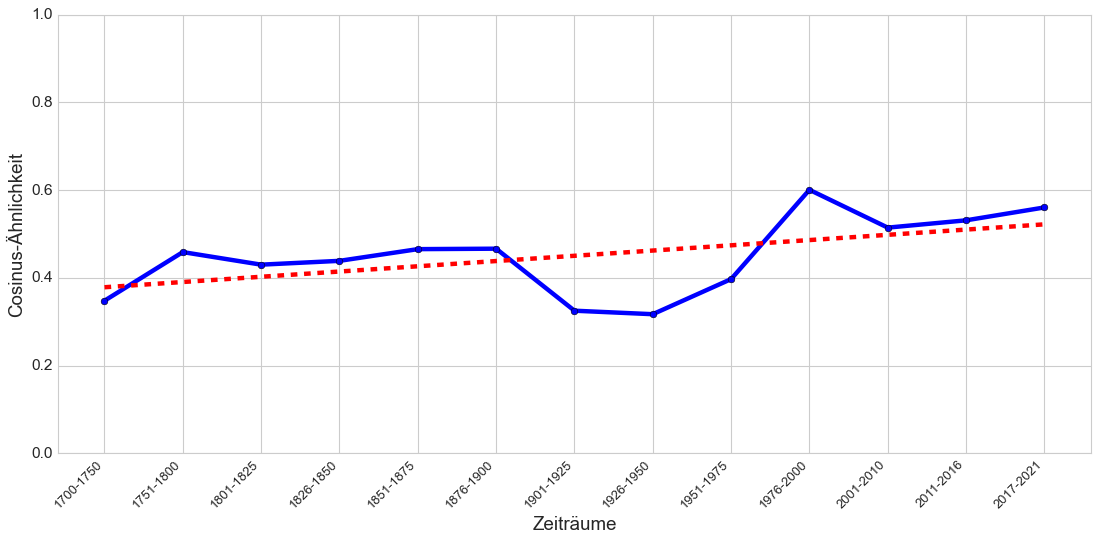

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

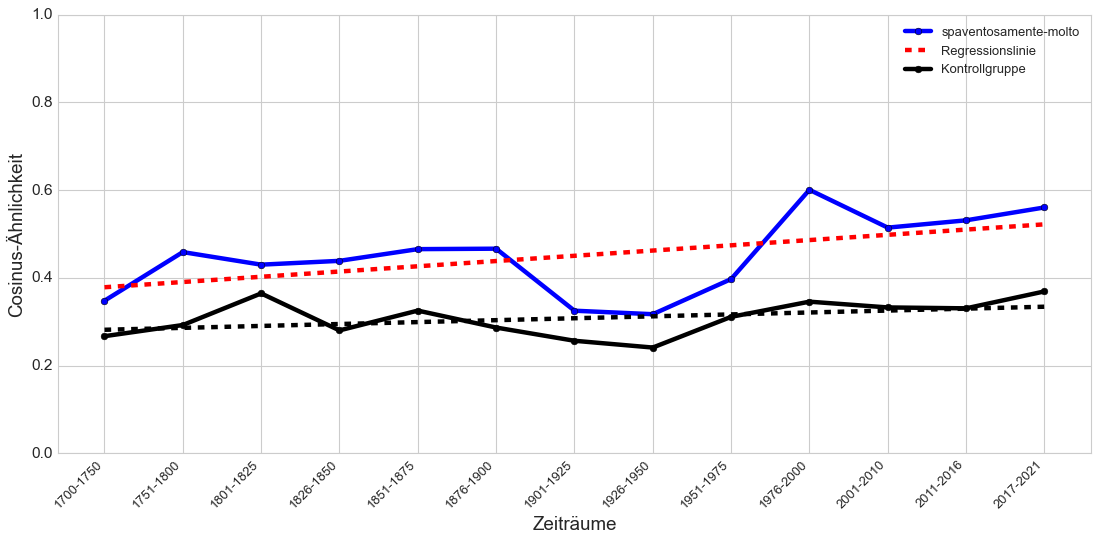

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [72]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [73]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

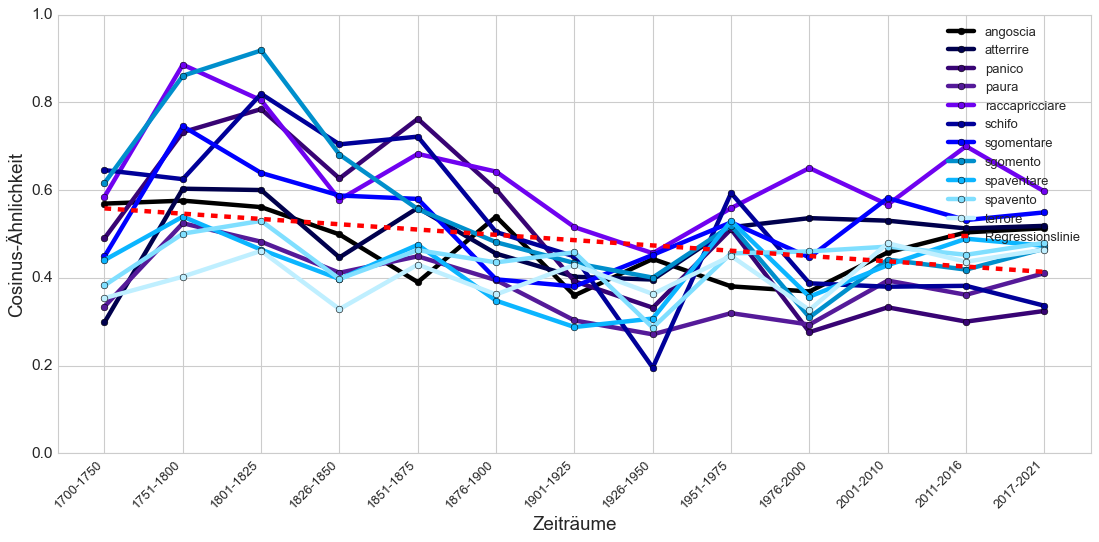

In [74]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

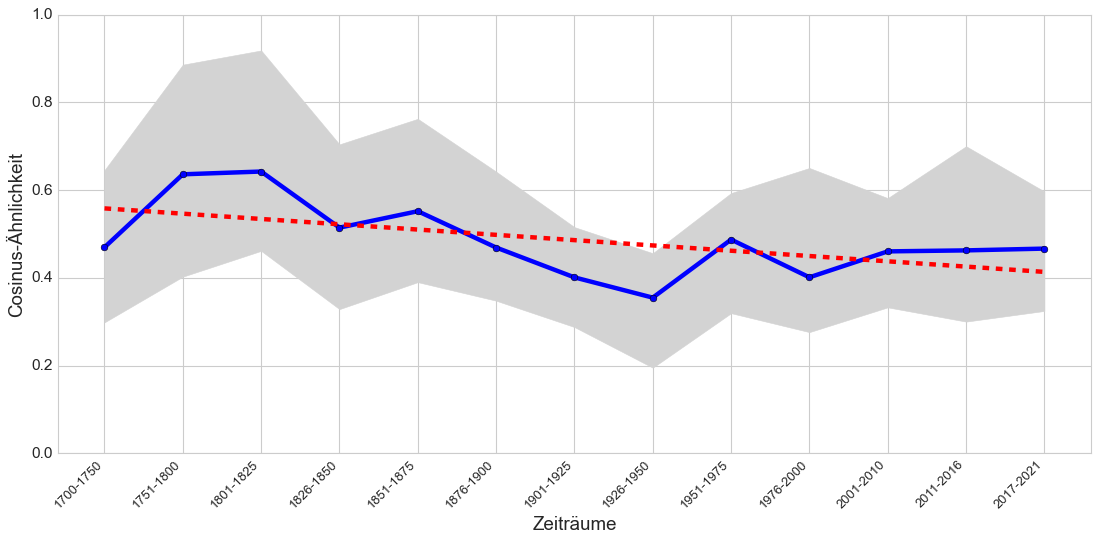

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

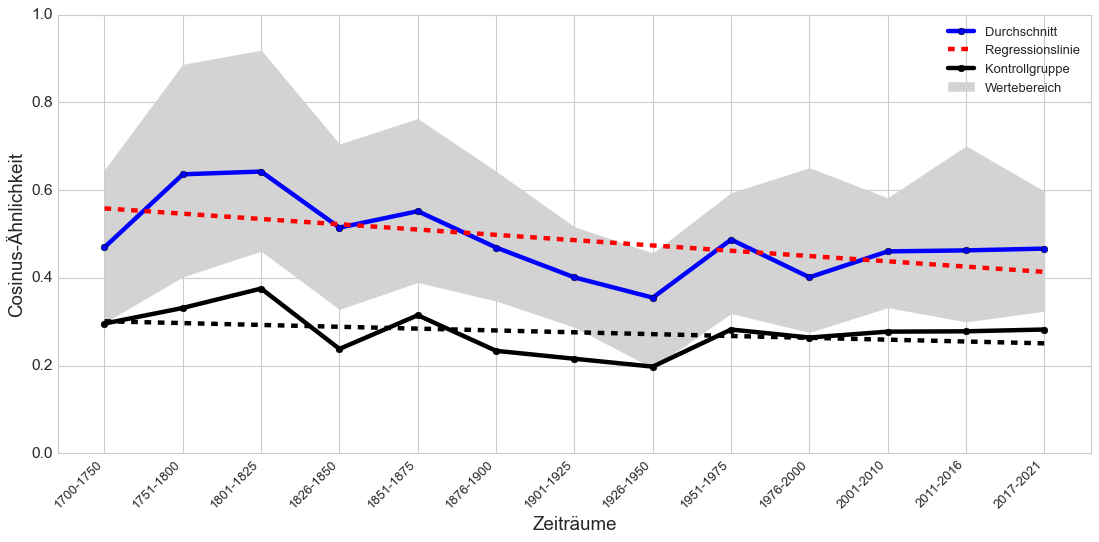

In [77]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [78]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(legnago, 0.8624715805053711)","(proclama, 0.840297520160675)","(taciturnità, 0.8788398504257202)","(esplosione, 0.8643165230751038)","(sentivasi, 0.8482292294502258)","(tremendamente, 0.69870525598526)","(zuccone, 0.6807605028152466)","(incomposto, 0.6600125432014465)","(pover, 0.7396154403686523)","(tremendamente, 0.8512153029441833)","(tremendamente, 0.8830317258834839)","(tremendamente, 0.852142870426178)","(tremendamente, 0.8666373491287231)"
1,"(garda, 0.8614609837532043)","(seguìta, 0.8388544321060181)","(letargo, 0.8759868741035461)","(percossa, 0.8397364020347595)","(assalse, 0.8394141793251038)","(spettro, 0.6829668283462524)","(odiava, 0.6588865518569946)","(passacantando, 0.6561176776885986)","(affabile, 0.7359323501586914)","(estremamente, 0.6688036918640137)","(spaventosamente, 0.7116671800613403)","(spaventosamente, 0.681507408618927)","(mostruosamente, 0.7655543088912964)"
2,"(occhiobello, 0.8506278395652771)","(astracan, 0.8377256989479065)","(incutere, 0.8735729455947876)","(stocco, 0.8390629887580872)","(dolorosamente, 0.8388984799385071)","(impassibile, 0.6821165084838867)","(torturare, 0.6414318680763245)","(gelosia, 0.6145865321159363)","(ascolta, 0.7269682884216309)","(talmente, 0.639686644077301)","(mostruosamente, 0.6935962438583374)","(mostruosamente, 0.6650594472885132)","(spaventosamente, 0.7342658638954163)"
3,"(moschetto, 0.8502218723297119)","(sulli, 0.8363998532295227)","(crudelmente, 0.8661012053489685)","(salvatrice, 0.8380942940711975)","(stravolgere, 0.8386428952217102)","(insensibile, 0.6730753779411316)","(vanamente, 0.6239238381385803)","(laido, 0.600532591342926)","(accidentato, 0.7247391939163208)","(faccenda, 0.6273036003112793)","(orribilmente, 0.6179686188697815)","(talmente, 0.6641826629638672)","(angosciare, 0.7086398601531982)"
4,"(impadronì, 0.8498489260673523)","(pechino, 0.8362784385681152)","(pietosamente, 0.8649827241897583)","(sbuffare, 0.8378013968467712)","(avvampare, 0.8383046388626099)","(sanguinoso, 0.6683449149131775)","(segrete, 0.6132818460464478)","(divago, 0.5949194431304932)","(neppur, 0.7210116386413574)","(particolarmente, 0.6257553100585938)","(profondamente, 0.5902437567710876)","(estremamente, 0.6391401290893555)","(affatto, 0.6942944526672363)"
5,"(didel, 0.8489425182342529)","(venivansi, 0.8348393440246582)","(stagnare, 0.8647788166999817)","(schioppi, 0.8337851762771606)","(istupidire, 0.8343685865402222)","(sanguinolento, 0.6638200283050537)","(atroce, 0.6122630834579468)","(straziare, 0.5809727907180786)","(malconcio, 0.7170213460922241)","(goffo, 0.6057960391044617)","(atrocemente, 0.5890656113624573)","(noioso, 0.6327800750732422)","(cinico, 0.6931273937225342)"
6,"(impreso, 0.8483904600143433)","(croll, 0.8338757157325745)","(tormentoso, 0.8641809821128845)","(dimenare, 0.8324946165084839)","(turbato, 0.8342519402503967)","(pallidezza, 0.6603521704673767)","(scombussolare, 0.6108214855194092)","(affliggere, 0.5794649124145508)","(vocina, 0.7170001268386841)","(spaventosamente, 0.5959931015968323)","(angosciare, 0.5849193930625916)","(orribilmente, 0.6303406953811646)","(assai, 0.6906699538230896)"
7,"(sbarcar, 0.8449528813362122)","(compite, 0.8337453007698059)","(riparar, 0.8641363382339478)","(urto, 0.8318778872489929)","(lievemente, 0.8310827612876892)","(truce, 0.6577128767967224)","(cagion, 0.6094484925270081)","(afflitto, 0.5755634903907776)","(malelingue, 0.7164205312728882)","(tecnicamente, 0.5958471298217773)","(angosciante, 0.579365074634552)","(abbastanza, 0.6302885413169861)","(apparentemente, 0.6870062351226807)"
8,"(infuocate, 0.8433685898780823)","(ciacconio, 0.8332371115684509)","(lente, 0.8632563948631287)","(pistola, 0.8316113352775574)","(svenire, 0.8295451402664185)","(oppresso, 0.6576770544052124)","(espiare, 0.6057589650154114)","(inguaribile, 0.5728467702865601)","(lontanamente, 0.715781569480896)

In [79]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.33214491605758667,
 '1751-1800': 0.4274267852306366,
 '1801-1825': 0.5638354420661926,
 '1826-1850': 0.4140320420265198,
 '1851-1875': 0.5077981352806091,
 '1876-1900': 0.41160255670547485,
 '1901-1925': 0.37412700057029724,
 '1926-1950': 0.36115562915802,
 '1951-1975': 0.5203722715377808,
 '1976-2000': 0.5468953847885132,
 '2001-2010': 0.4311830401420593,
 '2011-2016': 0.4544345438480377,
 '2017-2021': 0.5544235706329346}

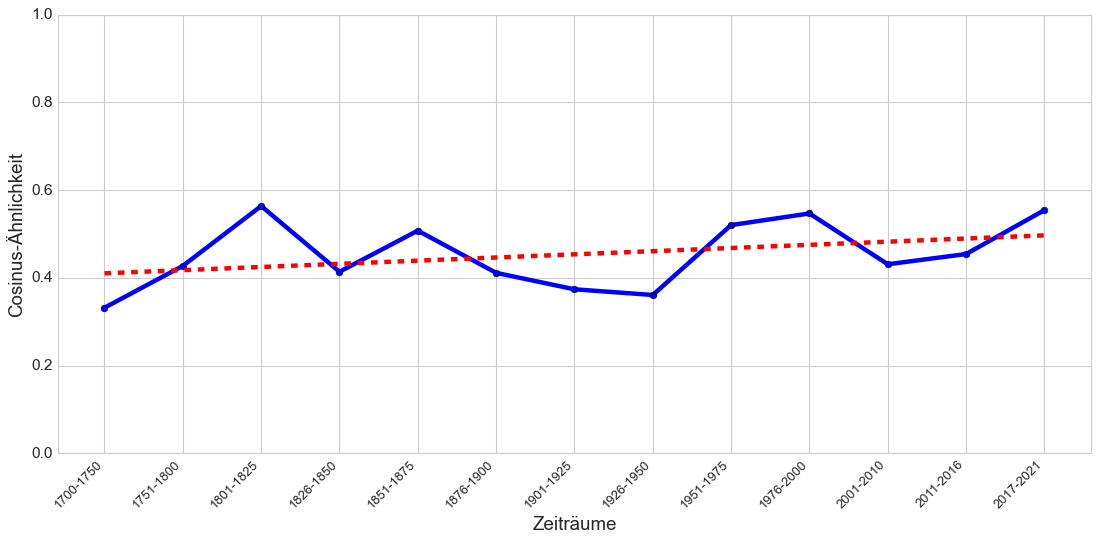

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [81]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [82]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

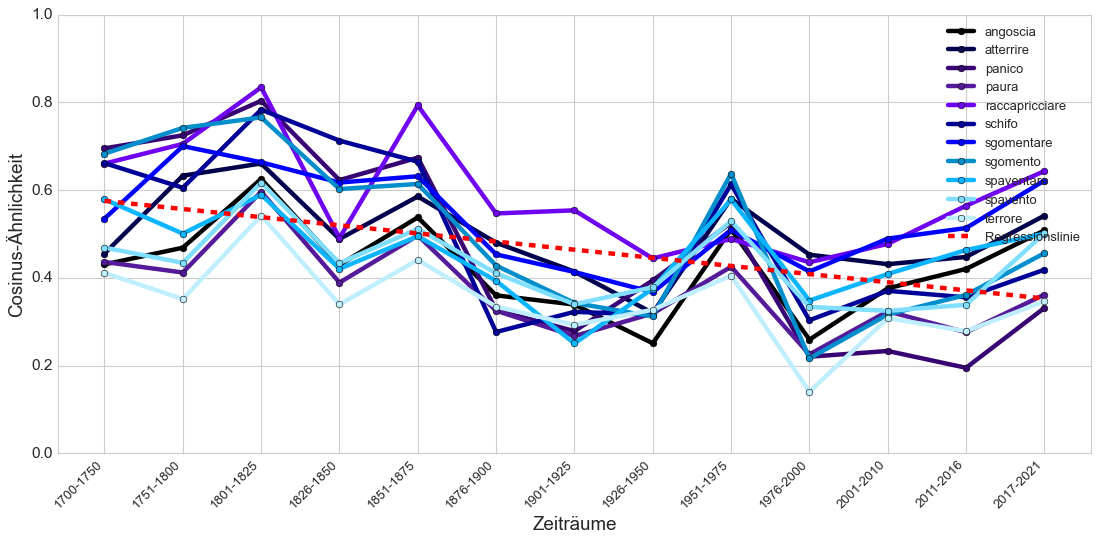

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

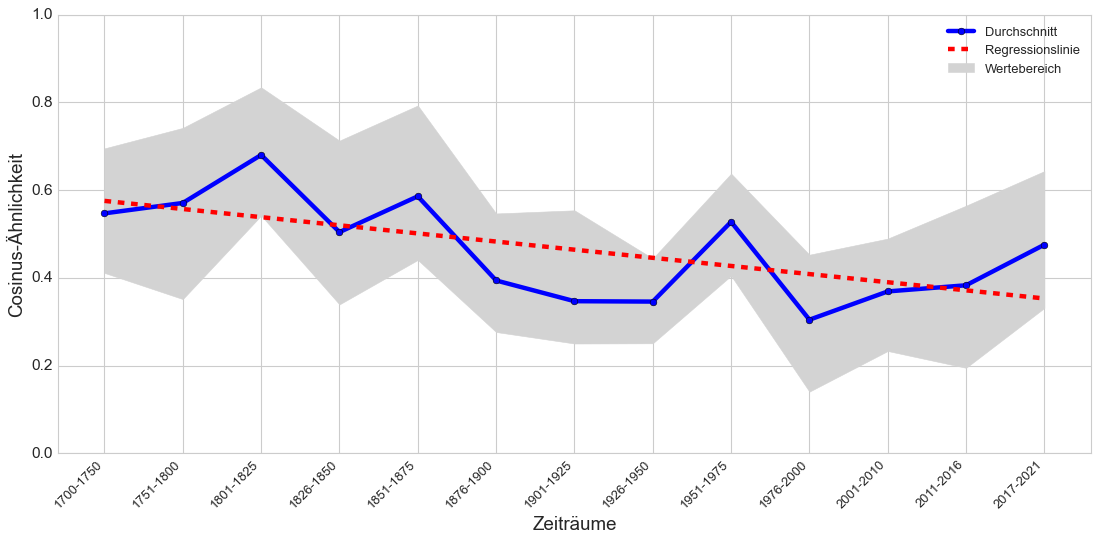

In [85]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

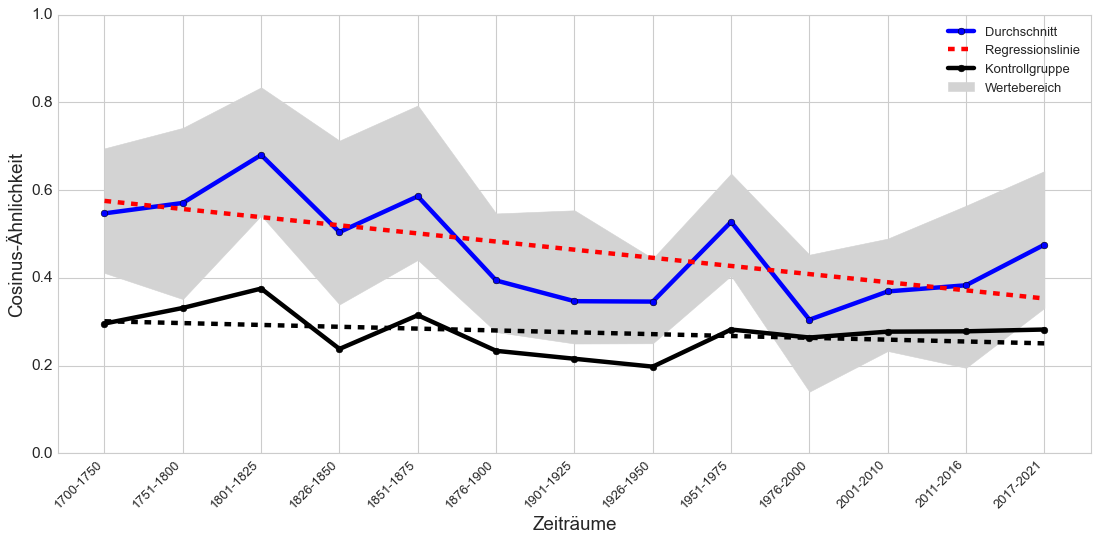

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [87]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(cardo, 0.9749717712402344)","(impudico, 0.9350428581237793)","(trafiggere, 0.8948813676834106)","(comprimere, 0.8549750447273254)","(onestamente, 0.8608094453811646)","(avvicinarsi, 0.7901807427406311)","(nefasto, 0.869765043258667)","(terribilmente, 0.8512152433395386)","(terribilmente, 0.8830317258834839)","(terribilmente, 0.8521431088447571)","(terribilmente, 0.8666374087333679)"
1,not in vocab,not in vocab,"(ischiere, 0.9743722677230835)","(albergassero, 0.9323669075965881)","(ghiacciato, 0.8787557482719421)","(spasmodico, 0.8500138521194458)","(serbarsi, 0.8599621653556824)","(inquietitudine, 0.7778775691986084)","(intransigentismo, 0.8579892516136169)","(spaventosamente, 0.7170532941818237)","(mostruosamente, 0.7511796951293945)","(mostruosamente, 0.6875264048576355)","(mostruosamente, 0.7702755331993103)"
2,not in vocab,not in vocab,"(giugurta, 0.9733595848083496)","(urgentissimo, 0.9293355941772461)","(delirante, 0.8785534501075745)","(delirii, 0.8495423793792725)","(accostarmi, 0.8595453500747681)","(persuaderà, 0.7727212905883789)","(seller, 0.856019139289856)","(estremamente, 0.7115858793258667)","(spaventosamente, 0.7297247052192688)","(abbastanza, 0.6852655410766602)","(spaventosamente, 0.7230120897293091)"
3,not in vocab,not in vocab,"(balio, 0.9731874465942383)","(ermolai, 0.9285213947296143)","(contorcere, 0.8773415684700012)","(ambascia, 0.8492956757545471)","(fedelt, 0.8539499640464783)","(inquietare, 0.7592427730560303)","(conflittualità, 0.8525543808937073)","(faccenda, 0.7021119594573975)","(alquanto, 0.653913140296936)","(estremamente, 0.6847103238105774)","(cinico, 0.6893806457519531)"
4,not in vocab,not in vocab,"(vulnerollo, 0.972858190536499)","(confermarli, 0.9247869849205017)","(stravolgere, 0.8772485852241516)","(annientare, 0.8448916673660278)","(pensata, 0.8531609773635864)","(saperti, 0.7575784921646118)","(antinaturalistico, 0.8519275784492493)","(mostruosamente, 0.6927125453948975)","(talmente, 0.6445646286010742)","(spaventosamente, 0.6536297798156738)","(assai, 0.688069760799408)"
5,not in vocab,not in vocab,"(indurisi, 0.9725803136825562)","(istupidire, 0.9230313897132874)","(rantolo, 0.873809814453125)","(combattuto, 0.844325840473175)","(mentiva, 0.8507063984870911)","(irrefrenabile, 0.7572348713874817)","(patrocinatore, 0.851573646068573)","(tecnicamente, 0.6865670680999756)","(orribilmente, 0.6374204754829407)","(talmente, 0.6461936831474304)","(apparentemente, 0.6794440746307373)"
6,not in vocab,not in vocab,"(lomero, 0.9723573923110962)","(mancatore, 0.9227431416511536)","(pulsazione, 0.8733724355697632)","(sdegnoso, 0.8409036993980408)","(gastigata, 0.8490249514579773)","(baglior, 0.7572214603424072)","(verte, 0.8487918376922607)","(noioso, 0.6769777536392212)","(profondamente, 0.6206963658332825)","(incredibilmente, 0.6453098058700562)","(talmente, 0.6683024168014526)"
7,not in vocab,not in vocab,"(potè, 0.9719305038452148)","(intromettersene, 0.920887291431427)","(agghiacciare, 0.8706651926040649)","(inasprire, 0.8401126861572266)","(ipnotismo, 0.8483660817146301)","(agghiacciare, 0.7550494074821472)","(logorio, 0.8481406569480896)","(spavaldo, 0.6751447319984436)","(estremamente, 0.6165704131126404)","(noioso, 0.6412771940231323)","(ripetitivo, 0.6663802266120911)"
8,not in vocab,not in vocab,"(piglier, 0.9716448187828064)","(gravarci, 0.9205092787742615)","(anelito, 0.8697121739387512)","(impressionabile, 0.8376930356025696)","(allontanamento, 0.8479737639427185)","(esecrabile, 0.7542035579681396)","(giacobinismo, 0.846846878528595)","(talmente, 0.6727537512779236)","(patetico, 0.6101476550102234)","(alquanto, 0.6344541907310486)","(estremamente, 0.6624569892883301)"
9,not in vocab,not in vocab,"(divorar, 0.9711155891418457)","(pupille, 0.920019268989563)","(comprimere, 0.8667703866958618)","(intollerabile, 0.837461292743

In [88]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.42364275455474854,
 '1826-1850': 0.45382845401763916,
 '1851-1875': 0.4801815152168274,
 '1876-1900': 0.4981200397014618,
 '1901-1925': 0.4702184200286865,
 '1926-1950': 0.3841853439807892,
 '1951-1975': 0.45398253202438354,
 '1976-2000': 0.6062824726104736,
 '2001-2010': 0.4980562925338745,
 '2011-2016': 0.5339215397834778,
 '2017-2021': 0.5421997308731079}

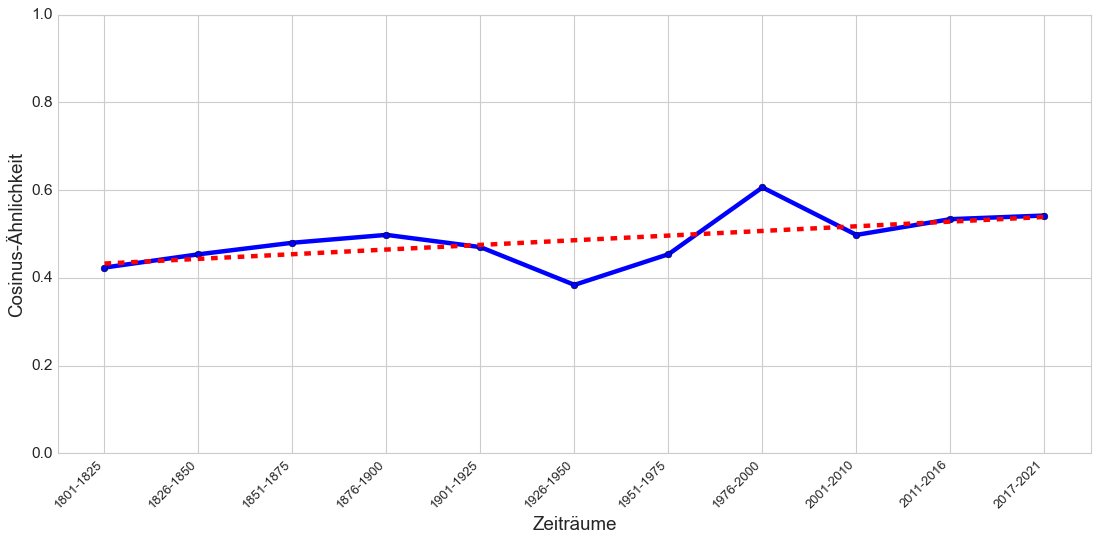

In [89]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [90]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [91]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

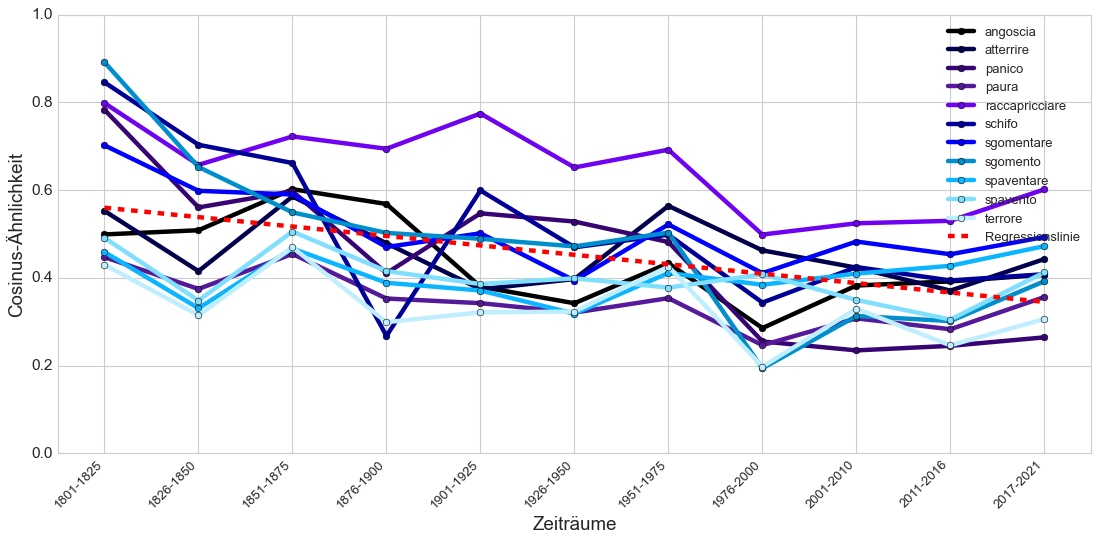

In [92]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

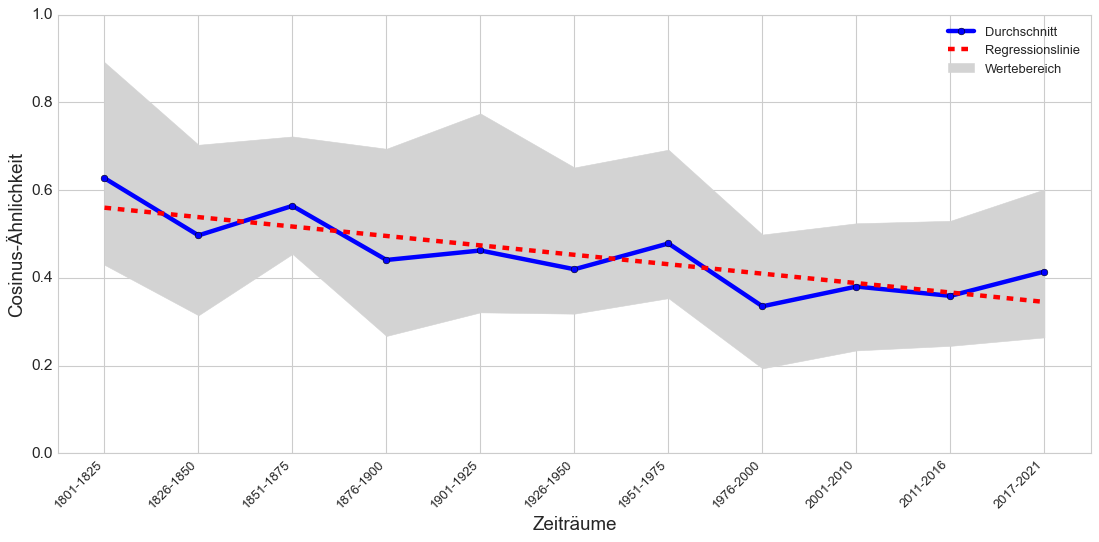

In [93]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()